In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from collections import defaultdict
import json
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/2017/2017_mod.csv')

In [4]:
se = pd.read_csv('../../data/2017/17_start_end_dt.csv')
se = [(datetime.strptime(row.Start, '%Y-%m-%d %H:%M:%S.%f'), datetime.strptime(row.End, '%Y-%m-%d %H:%M:%S.%f')) for index,row in se.iterrows()]

def checkGreen(time):
    t = datetime.strptime(time, '%Y-%m-%d %H:%M:%S.%f')
    for interval in se:
        if t > interval[0] and t < interval[1] + timedelta(minutes=2):
            return False
            
    return True

In [5]:
drivers = df['Driver'].unique()
lap_var = defaultdict(list)
drivers[0]

'Luis Felipe Derani'

In [6]:
df['SDT'] = pd.to_datetime(df['Session Time'], format='%Y-%m-%d %H:%M:%S.%f')
LapDT = pd.to_datetime(df['Lap Time'], format='%M:%S.%f')
df['LTS'] = [(t - datetime(1900, 1, 1)).total_seconds() for t in LapDT]
df

,Car,Class,Driver,Lap,Lap Time,Session Time,Flag,Location,S01,S02,...,S04,S05,S06,S07,S08,S09,S10,SP3,SDT,LTS
0,2,P,Luis Felipe Derani,1,1:37.146,1900-01-01 00:01:37.146000,Green,Track,3.315,8.565,...,3.570,0.461,12.573,19.626,29.498,5.126,3.073,178.219,1900-01-01 00:01:37.146,97.146
1,52,P,Olivier Pla,1,1:38.719,1900-01-01 00:01:38.719000,Green,Track,3.389,9.017,...,3.605,0.464,12.664,19.937,29.674,5.164,3.062,177.067,1900-01-01 00:01:38.719,98.719
2,5,P,Christian Fittipaldi,1,1:39.811,1900-01-01 00:01:39.811000,Green,Track,3.324,9.171,...,3.610,0.466,13.144,20.076,29.672,5.268,3.103,176.307,1900-01-01 00:01:39.811,99.811
3,31,P,Eric Curran,1,1:40.515,1900-01-01 00:01:40.515000,Green,Track,3.373,9.120,...,3.600,0.465,13.237,20.171,29.792,5.322,3.128,176.686,1900-01-01 00:01:40.515,100.515
4,85,P,Misha Goikhberg,1,1:41.552,1900-01-01 00:01:41.552000,Green,Track,3.287,9.273,...,3.624,0.473,13.453,20.315,30.083,5.307,3.086,173.698,1900-01-01 00:01:41.552,101.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898,27,GTD,Paolo Ruberti,186,1:46.362,1900-01-01 06:02:36.982000,Finish,Track,3.269,8.835,...,3.923,0.505,13.779,21.864,32.278,5.875,3.425,162.691,1900-01-01 06:02:36.982,106.362
6899,48,GTD,Bryan Sellers,186,1:46.413,1900-01-01 06:02:37.430000,Finish,Track,3.267,8.821,...,3.925,0.504,13.846,21.722,32.348,5.962,3.445,163.014,1900-01-01 06:02:37.430,106.413
6900,54,GTD,Colin Braun,186,1:45.684,1900-01-01 06:02:40.034000,Finish,Track,3.252,8.777,...,3.904,0.502,13.853,21.651,31.950,5.876,3.431,163.664,1900-01-01 06:02:40.034,105.684
6901,28,GTD,Michael Christensen,187,1:47.592,1900-01-01 06:02:48.999000,Finish,Track,3.312,8.940,...,3.939,0.509,14.072,22.037,32.733,5.968,3.475,161.413,1900-01-01 06:02:48.999,107.592


In [7]:
start_var_time = datetime(1900, 1, 1, 0, 10)
start_var_time

datetime.datetime(1900, 1, 1, 0, 10)

In [8]:
d = {}

In [9]:
for i in range(340):
    st = start_var_time + timedelta(minutes = i)
    et = start_var_time + timedelta(minutes = 10+i)
    
    temp = df[(df['SDT'] >= st) & (df['SDT'] <= et)]
    temp = temp[['Driver', 'LTS']].dropna()
    
    std_vals = temp.groupby('Driver').std()['LTS']
    std_vals = std_vals.dropna()
    d[i+10] = np.average(std_vals)

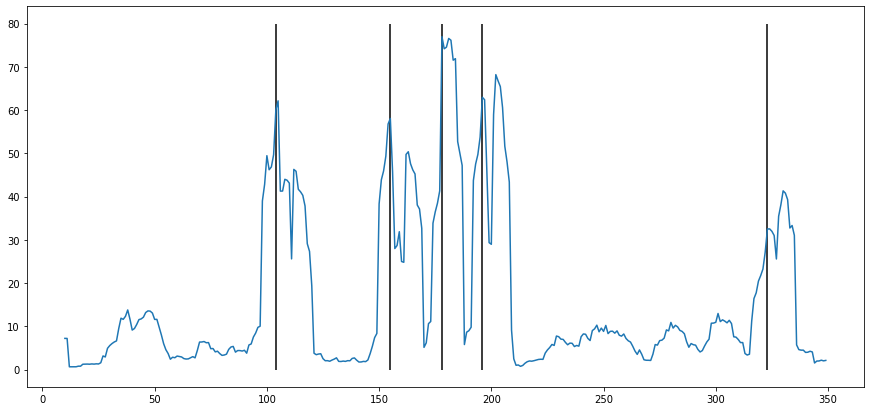

In [10]:
plt.figure(figsize=(15,7))
plt.plot(list(d.keys()), list(d.values()))
flagtimes = [6240.0, 9300.0, 10680.0, 11760.0, 19380.0]
flagtimes_m = [f // 60 for f in flagtimes]
plt.vlines(flagtimes_m, 0, 80)

In [7]:
for driver in drivers:
    temp = df[df['Driver'] == driver]
    
    for i in range(temp.shape[0]-2): 
        r1 = temp.iloc[i]
        r2 = temp.iloc[i+1]
        r3 = temp.iloc[i+2]
        
        if checkGreen(r1['Session Time']) and checkGreen(r2['Session Time']) and checkGreen(r3['Session Time']):
            t1 = datetime.strptime(r1['Lap Time'], '%M:%S.%f')
            t1s = (t1 - datetime(1900, 1, 1)).total_seconds()
            t2 = datetime.strptime(r2['Lap Time'], '%M:%S.%f')
            t2s = (t2 - datetime(1900, 1, 1)).total_seconds()
            t3 = datetime.strptime(r3['Lap Time'], '%M:%S.%f')
            t3s = (t3 - datetime(1900, 1, 1)).total_seconds()
            
            times = [t1s, t2s, t3s]
            moving_var = np.array(times).var()
            
            lap_var[driver].append(moving_var)
        else:
            lap_var[driver].append(-1)

In [7]:
lap_var_f = {driver: variances for driver, variances in lap_var.items() if len(variances) > 2}

In [8]:
with open('../../data/2021/21_lap_var.csv', 'w') as f:
    f.write('Driver,Var\n')
    for d, v in lap_var_f.items():
        f.write("%s,%s\n"%(d,v))